In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import ast

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

df['job_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\HAROON TRADERS\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_pak=df[df['job_country']=='Pakistan'].copy()

In [5]:
df_skills=df_pak.explode('job_skills')

In [6]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()

In [11]:
df_job_title_count = df_pak['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,638
1,Data Scientist,370
2,Data Analyst,259
3,Software Engineer,235
4,Machine Learning Engineer,202
5,Senior Data Engineer,160
6,Senior Data Scientist,113
7,Business Analyst,99
8,Cloud Engineer,43
9,Senior Data Analyst,29


In [9]:
#Converting series to data frame

df_skills_count=df_skills_count.reset_index(name='skill_count').sort_values(by='skill_count',ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
752,sql,Data Engineer,459
591,python,Data Engineer,392
49,aws,Data Engineer,276
592,python,Data Scientist,244
753,sql,Data Scientist,204
...,...,...,...
869,yarn,Senior Data Engineer,1
871,zoom,Data Engineer,1
872,zoom,Machine Learning Engineer,1
25,arch,Data Scientist,1


In [15]:
df_skills_perc = pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')

df_skills_perc['skill_percent'] = 100*df_skills_perc['skill_count']/df_skills_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,459,638,71.943574
1,python,Data Engineer,392,638,61.442006
2,aws,Data Engineer,276,638,43.260188
3,python,Data Scientist,244,370,65.945946
4,sql,Data Scientist,204,370,55.135135
...,...,...,...,...,...
869,yarn,Senior Data Engineer,1,160,0.625000
870,zoom,Data Engineer,1,638,0.156740
871,zoom,Machine Learning Engineer,1,202,0.495050
872,arch,Data Scientist,1,370,0.270270


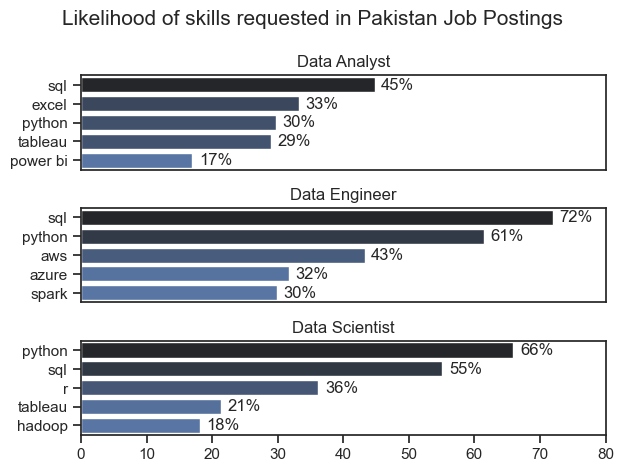

In [37]:
job_titles=['Data Analyst','Data Engineer','Data Scientist']

fig,ax=plt.subplots(3,1)
sns.set_theme(style='ticks')
ax = ax.flatten()

for i,job_title in enumerate(job_titles):
    df_plot=df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_count',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].legend().set_visible(False)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,80)

    for n,value in enumerate(df_plot['skill_percent']):
        ax[i].text(value+1,n,f'{value:.0f}%',va='center')

    if i!=len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of skills requested in Pakistan Job Postings',fontsize=15)
fig.tight_layout()
